In [168]:
#Importing

import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [169]:
#Loading Data

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

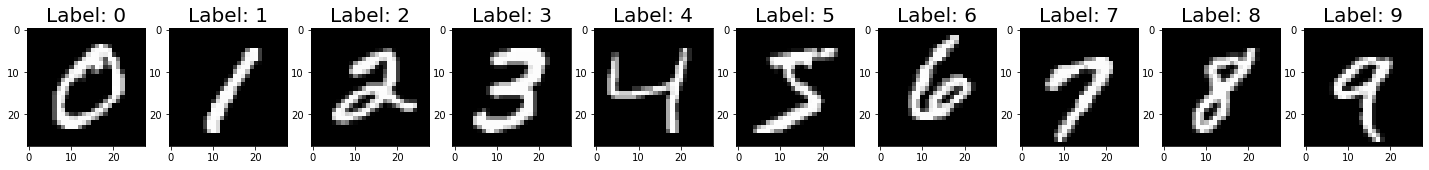

In [170]:
#Showcasing Data

quantity = 10

f, ax = plt.subplots(1, quantity, figsize=(25,25))
for i in range(quantity):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample,cmap='gray')
    ax[i].set_title("Label: {}".format(i), fontsize=20)

In [171]:
#Onehotencoding

y_train = keras.utils.to_categorical(y_train, quantity)
y_test = keras.utils.to_categorical(y_test, quantity)

In [172]:
#Normalizing and reshaping

x_train = x_train/255
x_test = x_test/255

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [167]:
#Building model

model = Sequential()
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=40, validation_split=0.2, verbose=1)


1500/1500 [==============================] - 3s 1ms/step - loss: 0.2915 - accuracy: 0.9126 - val_loss: 0.1226 - val_accuracy: 0.9631
Epoch 2/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1217 - accuracy: 0.9629 - val_loss: 0.0988 - val_accuracy: 0.9719
Epoch 3/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0846 - accuracy: 0.9741 - val_loss: 0.0933 - val_accuracy: 0.9726
Epoch 4/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0665 - accuracy: 0.9790 - val_loss: 0.1037 - val_accuracy: 0.9678
Epoch 5/40
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0535 - accuracy: 0.9833 - val_loss: 0.0893 - val_accuracy: 0.9756
Epoch 6/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0462 - accuracy: 0.9854 - val_loss: 0.0863 - val_accuracy: 0.9758
Epoch 7/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0387 - accuracy: 0.9872 - val_loss: 0.0869 - val_accuracy: 0.9772
Epo

In [173]:
#Evaluate model

model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1642 - accuracy: 0.9799


[0.164201557636261, 0.9799000024795532]

In [174]:
#Save model

model.save('model.h5')

313/313 [==============================] - 0s 923us/step


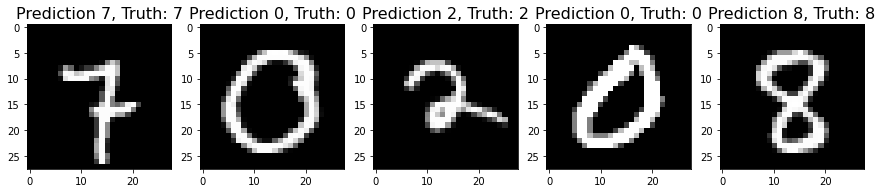

In [175]:
#Visual Evaluation of samples

predictions = model.predict(x_test)
predictions_classes = np.argmax(predictions,axis=1)

Frames = 5

f, ax = plt.subplots(1,Frames,figsize=(15,15))

for i in range(Frames):
    random_idx = np.random.choice(len(x_test))
    x_sample = x_test[random_idx]
    y_true = np.argmax(y_test, axis=1)
    y_sample_truth = y_true[random_idx]
    y_sample_predicted_class = predictions_classes[random_idx]



    ax[i].set_title("Prediction {}, Truth: {}".format(y_sample_predicted_class, y_sample_truth), fontsize=16)
    ax[i].imshow(x_sample.reshape(28,28),cmap='gray')

Text(0.5, 1.0, 'Confusion Matrix')

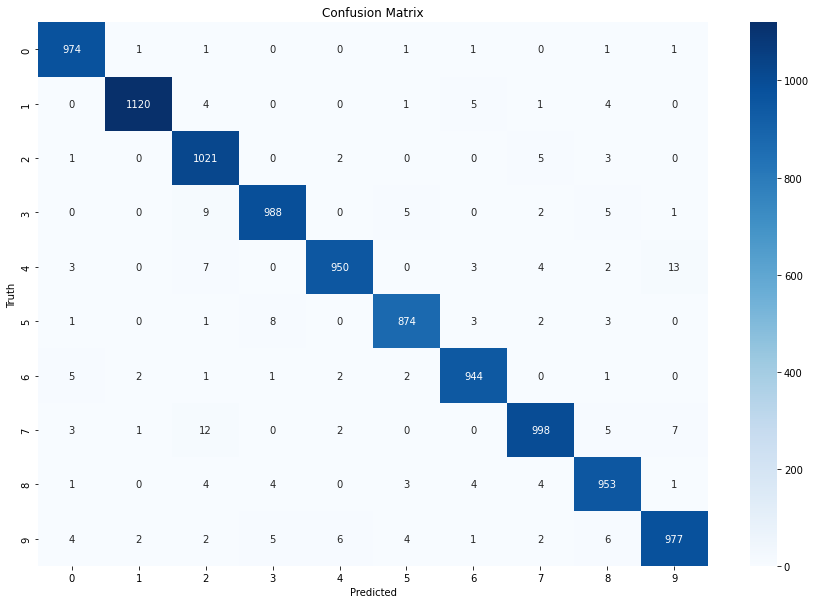

In [176]:
#Visual Evaluation of entire dataset

confusion_matrix = confusion_matrix(y_true, predictions_classes)

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="Blues")
ax.set_xlabel("Predicted")
ax.set_ylabel("Truth")
ax.set_title("Confusion Matrix")
